In [1]:
%load_ext autoreload
%autoreload 2
from multigrid.envs import ConstrainedEnv
import matplotlib.pyplot as plt

env = ConstrainedEnv(render_mode="rgb_array", agents=2)


state, info = env.reset()

pygame 2.5.1 (SDL 2.28.2, Python 3.11.0)
Hello from the pygame community. https://www.pygame.org/contribute.html
self.max_steps=200


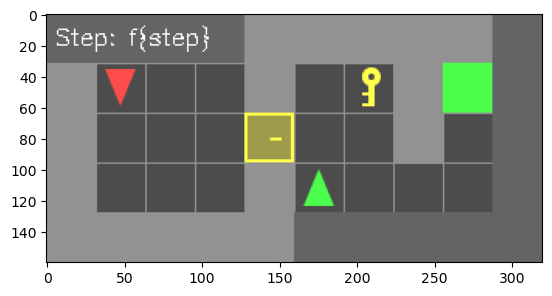

In [2]:
# Test a step and show environment is working

action = env.action_space.sample()
env.step(action)
img = env.render()
plt.imshow(img)
plt.show()


In [3]:
from DQN_multi_agent import *

In [4]:

import torch.nn as nn
import torch
import gymnasium as gym
from stable_baselines3.common.torch_layers import BaseFeaturesExtractor
from typing import Dict


class MultiAgentMinigridFeaturesExtractor(BaseFeaturesExtractor):
    def __init__(self, observation_space: gym.Space, features_dim: int = 512, normalized_image: bool = False) -> None:
        super().__init__(observation_space, features_dim)

        # Assume all agents have the same observation space
        agent_obs_space = observation_space.spaces[0]['image']
        n_input_channels = agent_obs_space.shape[0]

        self.cnn = nn.Sequential(
            nn.Conv2d(n_input_channels, 16, (2, 2)),
            nn.ReLU(),
            nn.Conv2d(16, 32, (2, 2)),
            nn.ReLU(),
            nn.Conv2d(32, 64, (2, 2)),
            nn.ReLU(),
            nn.Flatten(),
        )

        # Compute shape by doing one forward pass
        with torch.no_grad():
            n_flatten = self.cnn(torch.as_tensor(agent_obs_space.sample()[None]).float()).shape[1]

        self.linear = nn.Sequential(nn.Linear(n_flatten, features_dim), nn.ReLU())

    def forward(self, observations: Dict[int, Dict[str, torch.Tensor]]) -> torch.Tensor:
        # Extract image observations for each agent and pass through CNN
        image_obs = torch.stack([obs_dict['image'] for obs_dict in observations.values()])
        cnn_out = self.cnn(image_obs)

        # Pass CNN output through linear layer
        return self.linear(cnn_out)



In [5]:
action = env.action_space.sample()
print(action)
keys  =list(action.keys())
second_key = keys[1]
second_item = (second_key, action[second_key])
second_item

OrderedDict([(0, 5), (1, 5)])


(1, 5)

In [6]:
env.observation_space.spaces[0]['image'].sample()[None]

array([[[[ 38, 118, 200],
         [182,  78,  69],
         [200,   3,  43],
         [188, 199, 158],
         [  9, 135,  16],
         [ 40, 147,  18],
         [239,  85, 239]],

        [[ 22,  76, 137],
         [197, 228, 104],
         [ 81,  60, 186],
         [129, 183, 138],
         [ 11,  16, 210],
         [151,  74, 216],
         [145, 122, 122]],

        [[140, 188, 174],
         [ 73,  33,  90],
         [203,  69, 184],
         [121, 238, 179],
         [125,  82, 200],
         [242,  20,  52],
         [ 72,  42, 215]],

        [[ 56, 248,  87],
         [ 68, 177,  27],
         [110, 232,  30],
         [118, 246,  18],
         [ 41,  35,  72],
         [ 32, 242, 113],
         [181, 229, 215]],

        [[100, 139,  89],
         [ 81, 119, 202],
         [  7, 135,  88],
         [124, 253, 148],
         [ 73, 107,  13],
         [ 53, 116,  44],
         [158, 249, 152]],

        [[133,  33, 215],
         [  5, 165, 100],
         [162, 224,  36],
  

In [7]:
agent = Agent(env)
agent.train(20,env)
print("we did it")

: 

In [ ]:
print(env.observation_space)

Dict(0: Dict('direction': Discrete(4), 'image': Box(0, 255, (7, 7, 3), int64), 'mission': MissionSpace('get to the green goal square, you rascal')), 1: Dict('direction': Discrete(4), 'image': Box(0, 255, (7, 7, 3), int64), 'mission': MissionSpace('get to the green goal square, you rascal')))


In [ ]:
env = gym.make(
    "LunarLander-v2",
    continuous = False,
    gravity = -10.0,
    enable_wind = False,
    wind_power = 15.0,
    turbulence_power = 1.5
)

Box([-1.5       -1.5       -5.        -5.        -3.1415927 -5.
 -0.        -0.       ], [1.5       1.5       5.        5.        3.1415927 5.        1.
 1.       ], (8,), float32)

In [10]:
import minigrid

In [14]:
import gymnasium
import minigrid

# Create a MiniGrid environment
env = gym.make('MiniGrid-Empty-5x5-v0')

# Reset the environment
obs = env.reset()

# Render the initial state
env.render(
    
)